In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/Users/macbook/GA-DSI/curriculum/week-05/1.3-classification-challenge/classification_challenge_training.csv') # read in the census-derived data; mind the separator
del df['Unnamed: 0']

df.head()

,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
1,32,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,1
2,29,Private,10th,6,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico,0
3,30,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,0
4,66,Private,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,8,United-States,0


In [ ]:
# Check values and their counts
pd.set_option('display.max_rows', 500)
df.apply(lambda c: c.value_counts()).T.stack()

In [3]:

df = df[df['type_employer'] != 'Never-worked']

In [4]:
d={'11th':"HS-non-grad", 'HS-grad':'HS-grad', '10th':"HS-non-grad", 'Assoc-voc':'College', 'Bachelors':'College', \
   'Some-college':'Some-college','Assoc-acdm':'College', '12th':"HS-non-grad", 'Doctorate':'Higher-Level Education', \
   'Masters':'Higher-Level Education','9th':"HS-non-grad", '5th-6th':"HS-non-grad",'1st-4th':"HS-non-grad",\
   'Prof-school':'College', '7th-8th':"HS-non-grad", 'Preschool':"HS-non-grad"}
df['education']=df['education'].apply(lambda x: d[x])


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [6]:
df1 = pd.get_dummies(df,columns = ['type_employer','education','marital', 'occupation','relationship','race','sex'])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 77) ## create train-test out of the data given

In [7]:
y=df["income"].copy()
del df1['income']
del df1['country']
X=df1

In [9]:
""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

In [ ]:
""" Fit a binary classification predictor."""

y_pred = ?.predict(X_test)
y_score = ?.decision_function(X_test) # Submit these response, the output of model.decision_function

           predicted_over50k  predicted_under50k
over_50k                1196                 755
under_50k                474                5632
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      6106
          1       0.72      0.61      0.66      1951

avg / total       0.84      0.85      0.84      8057



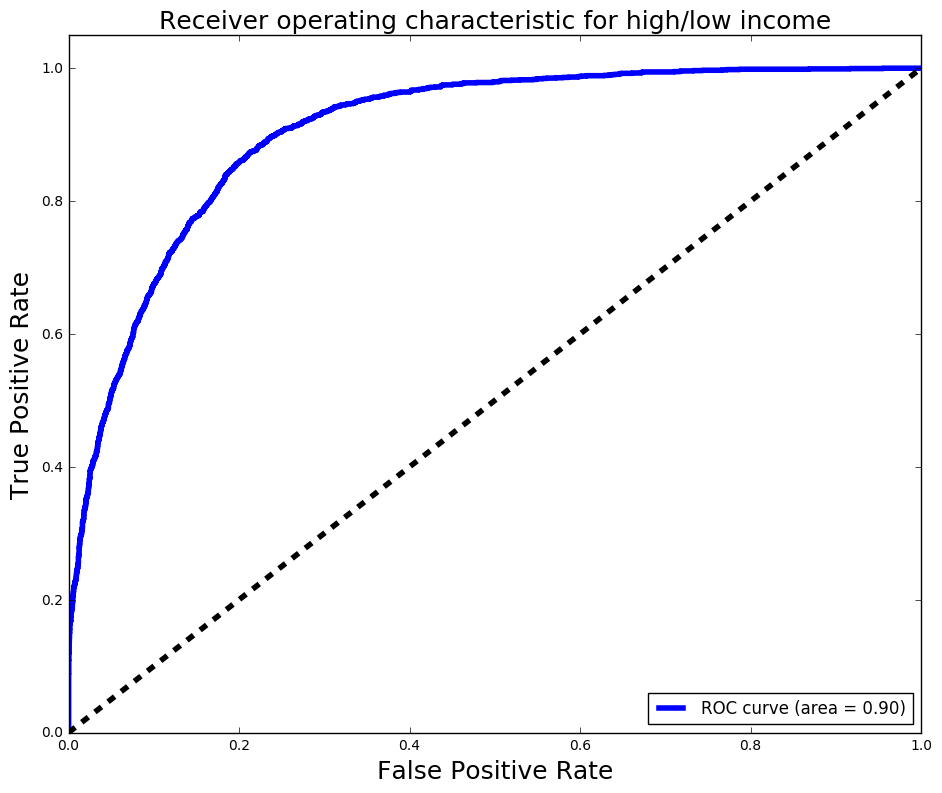

In [10]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(y_test,cv_pred)
roc_auc_score(y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
dummies = pd.get_dummies(df,columns = ['sex'])
i=0
while i<len(dummies):
    mult=df.loc[i,'race']
    j=0
    while j<len(dummies.columns):
        dummies.iloc[i,j]=dummies.iloc[i,j]*mult
        j+=1
    i+=1
for x in dummies.columns:
    df1[x]=dummies[x].copy()

In [11]:
df_sub = pd.read_csv('/Users/macbook/GA-DSI/curriculum/week-05/1.3-classification-challenge/classification_challenge_submission.csv') # read in the census-derived data; mind the separator
del df_sub['Unnamed: 0']

df_sub.head()

,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country
0,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States
1,17,Private,12th,8,Never-married,Sales,Own-child,White,Male,0,0,40,United-States
2,24,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
3,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States
4,59,Private,Bachelors,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States


In [12]:
d_sub={'11th':"HS-non-grad", 'HS-grad':'HS-grad', '10th':"HS-non-grad", 'Assoc-voc':'College', 'Bachelors':'College', \
   'Some-college':'Some-college','Assoc-acdm':'College', '12th':"HS-non-grad", 'Doctorate':'Higher-Level Education', \
   'Masters':'Higher-Level Education','9th':"HS-non-grad", '5th-6th':"HS-non-grad",'1st-4th':"HS-non-grad",\
   'Prof-school':'College', '7th-8th':"HS-non-grad", 'Preschool':"HS-non-grad"}
df_sub['education']=df_sub['education'].apply(lambda x: d[x])


In [13]:
df_sub = pd.get_dummies(df_sub,columns = ['type_employer','education','marital', 'occupation','relationship','race','sex'])

In [14]:
del df_sub['country']


In [15]:

#y = sub_df['income'].copy()
#del df1['income']
#del df1['country']
X_sub = df_sub
X_sub


sub_y_pred = cv_model.predict(X_sub)
y_score_sub = cv_model.decision_function(X_sub)
y_score_sub

array([-0.92613457, -5.43309348, -3.68213146, ...,  1.1272796 ,
        0.82525703,  1.58114996])

In [16]:
y_score_sub.reshape((len(y_score_sub),1))

array([[-0.92613457],
       [-5.43309348],
       [-3.68213146],
       ..., 
       [ 1.1272796 ],
       [ 0.82525703],
       [ 1.58114996]])

In [31]:
X.shape

(24413, 53)

In [19]:
lr = LogisticRegression(solver='liblinear')
lr_model = lr.fit(X_train, y_train)
lr_ypred = lr_model.predict(X_test)

In [20]:
lr_cm = confusion_matrix(y_test, lr_ypred, labels=lr.classes_)
lr_cm = pd.DataFrame(lr_cm, columns=lr.classes_, index=lr.classes_)
lr_cm

,0,1
0,5629,477
1,754,1197


In [21]:
print classification_report(y_test, lr_ypred, labels=lr.classes_)

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      6106
          1       0.72      0.61      0.66      1951

avg / total       0.84      0.85      0.84      8057



In [22]:
cvs1 = cross_val_score(lr, X, y, cv=3, scoring='f1_weighted')
cvs1

array([ 0.84910604,  0.84766848,  0.8393696 ])

In [23]:
cvs1.mean()

0.84538137386260159

In [24]:
lr_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear')
lr_l1_model = lr_l1.fit(X_train, y_train)

In [26]:
lr_l1_model = lr_l1.fit(X_train, y_train)
lr_l1_ypred = lr_l1_model.predict(X_test)

In [27]:
lr_l1_cm = confusion_matrix(y_test, lr_l1_ypred, labels=lr_l1.classes_)
lr_l1_cm = pd.DataFrame(lr_l1_cm, columns=lr_l1.classes_, index=lr_l1.classes_)
lr_l1_cm

,0,1
0,5633,473
1,766,1185


In [28]:
cvs2 = cross_val_score(lr_l1, X, y, cv=3)
cvs2.mean()

0.85159520253425314

In [29]:
def test_penalties(c_val):
    lr_l1 = LogisticRegression(C=c_val, penalty='l1', solver='liblinear')
    cvs = cross_val_score(lr_l1, X, y, cv=3, scoring='f1_weighted')
    return cvs

In [30]:
test_cs = pd.Series([.001, .01, .1, 1, 1.5, 2.5, 5, 10, 100]).to_frame('c_vals')
score_frame = pd.DataFrame([test_penalties(x) for x in test_cs['c_vals']]).mean(axis=1).to_frame('score')

final_scores = pd.concat([test_cs, score_frame], axis=1)
final_scores

,c_vals,score
0,0.001,0.767433
1,0.010,0.831382
2,0.100,0.845378
3,1.000,0.846452
4,1.500,0.846486
5,2.500,0.847029
6,5.000,0.846762
7,10.000,0.846933
8,100.000,0.846688


In [32]:
final_scores['c_vals'][final_scores['score'].idxmax()]

2.5

In [33]:
logreg_cv = LogisticRegressionCV(Cs=20, solver='liblinear', cv=3, penalty='l1', scoring='f1')
cv_model = logreg_cv.fit(X_train, y_train)

In [34]:
submission = pd.read_csv('classification_challenge_submission.csv')
submission
del submission['Unnamed: 0']
del submission['country']
#submission['sex_race'] = submission['sex'] + "_" + submission['race']
d={'11th':"HS-non-grad", 'HS-grad':'HS-grad', '10th':"HS-non-grad", 'Assoc-voc':'College', 'Bachelors':'College', \
  'Some-college':'Some-college','Assoc-acdm':'College', '12th':"HS-non-grad", 'Doctorate':'Higher-Level Education', \
  'Masters':'Higher-Level Education','9th':"HS-non-grad", '5th-6th':"HS-non-grad",'1st-4th':"HS-non-grad",\
  'Prof-school':'College', '7th-8th':"HS-non-grad", 'Preschool':"HS-non-grad"}
submission['education'] = submission['education'].apply(lambda x: d[x])
submission.head()

  
"""Clean/munge your data."""
sub_df = pd.get_dummies(submission,columns = ['type_employer','education','marital', 'occupation','relationship','race','sex'])
#y = sub_df['income'].copy()
#del df1['income']
#del df1['country']
X_sub = sub_df
# print X_sub.shape
# print X.shape

 
sub_y_pred = cv_model.predict(X_sub)
y_score_sub = cv_model.decision_function(X_sub)

 
sub_yscore = y_score_sub.reshape((len(y_score_sub),1))
sub_yscore.shape


X_sub['y_score'] = sub_yscore



In [36]:
sub_yscore

array([[-0.98398971],
       [-5.19468116],
       [-3.83073447],
       ..., 
       [ 1.24837992],
       [ 0.90330946],
       [ 1.62966622]])